<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/4%EC%9D%BC%EC%B0%A8/%ED%99%95%EB%A5%A0_%ED%91%9C%EB%B3%B8%EC%A4%91%EC%8B%AC%EA%B7%B9%ED%95%9C%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **확률변수(Random Variable)와 확률분포(Probability Distribution)**

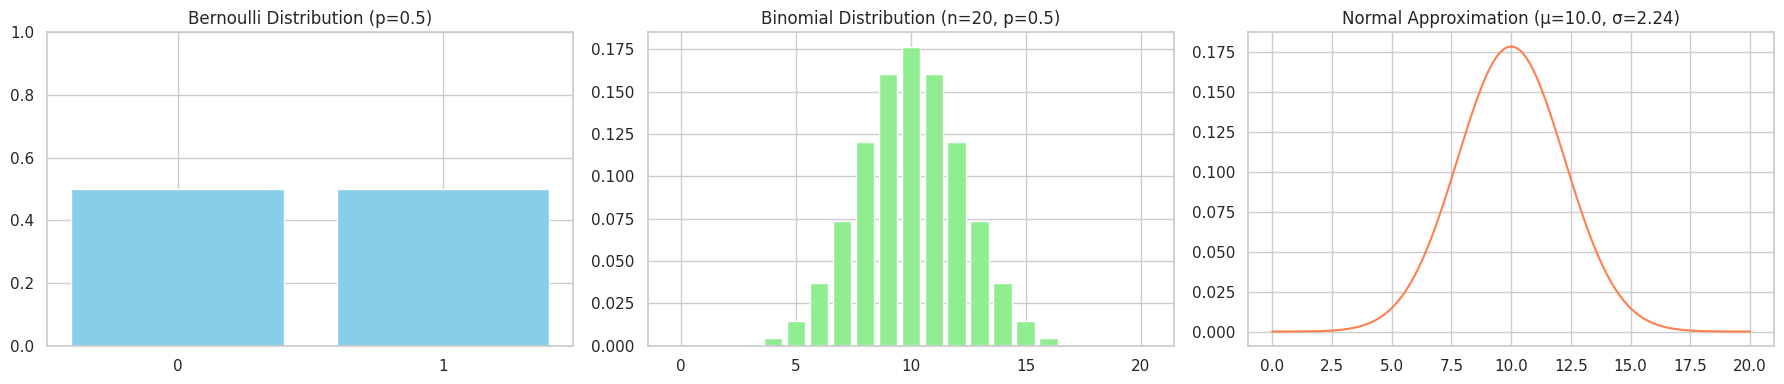

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, norm

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# 베르누이 분포 시각화
p = 0.5

x_ber = [0, 1]
y_ber = bernoulli.pmf(x_ber, p)
axs[0].bar(x_ber, y_ber, color='skyblue')
axs[0].set_title(f"Bernoulli Distribution (p={p})")
axs[0].set_xticks([0, 1])
axs[0].set_ylim(0, 1)

# 이항 분포 시각화
n = 20
x_bin = np.arange(0, n+1)
y_bin = binom.pmf(x_bin, n=n, p=p)
axs[1].bar(x_bin, y_bin, color='lightgreen')
axs[1].set_title(f"Binomial Distribution (n={n}, p={p})")

# 정규 분포 (이항 분포 근사)
mu = n * p
sigma = np.sqrt(n * p * (1 - p))
x_norm = np.linspace(0, n, 200)
y_norm = norm.pdf(x_norm, loc=mu, scale=sigma)
axs[2].plot(x_norm, y_norm, color='coral')
axs[2].set_title(f"Normal Approximation (μ={mu:.1f}, σ={sigma:.2f})")

plt.tight_layout()
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
size = 100000

# 모집단: 오른쪽으로 치우친 분포 (지수분포)
exponential_data = np.random.exponential(scale=2, size=size)

# 균일 분포 (Uniform Distribution) 생성
uniform_data = np.random.uniform(0, 10, size=size)

# 정규 분포 (Normal Distribution) 생성
normal_data = np.random.normal(5, 2, size=size)

# 푸아송 분포 (Poisson Distribution) 생성
poisson_data = np.random.poisson(5, size=size)


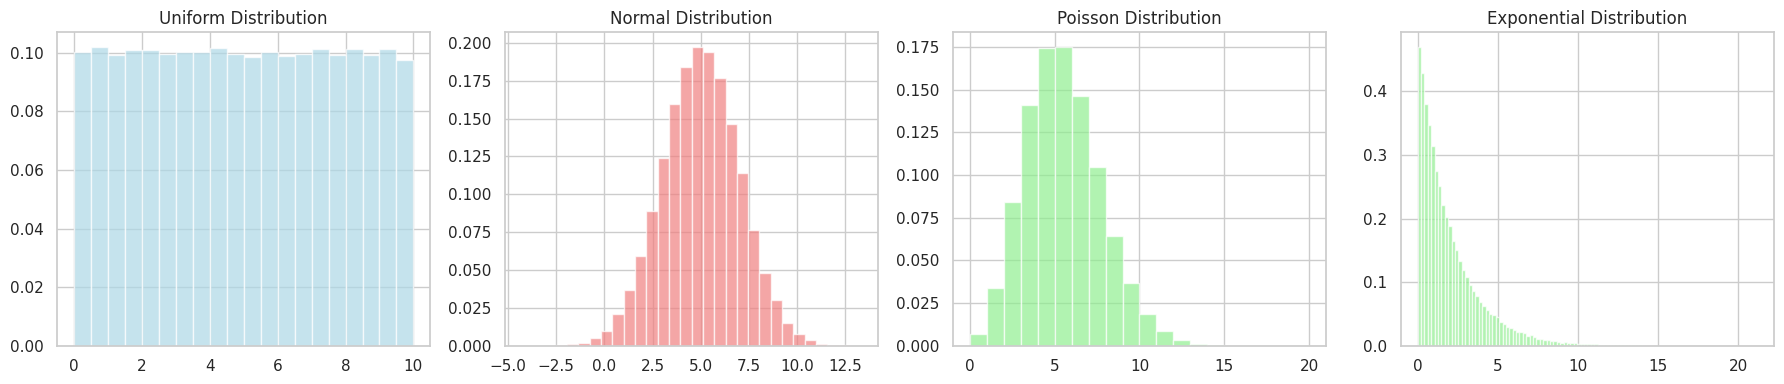

In [10]:
# 시각화를 위한 새로운 figure 생성 (기존 코드에 추가하여 표시)
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# 균일 분포 히스토그램
axs[0].hist(uniform_data, bins=20, color='lightblue', density=True, alpha=0.7)
axs[0].set_title("Uniform Distribution")

# 정규 분포 히스토그램
axs[1].hist(normal_data, bins=30, color='lightcoral', density=True, alpha=0.7)
axs[1].set_title("Normal Distribution")

# 푸아송 분포 히스토그램
axs[2].hist(poisson_data, bins=20, color='lightgreen', density=True, alpha=0.7)
axs[2].set_title("Poisson Distribution")

# 지수 분포 히스토그램
axs[3].hist(exponential_data, bins=100, color='lightgreen', density=True, alpha=0.7)
axs[3].set_title("Exponential Distribution")

plt.tight_layout()
plt.show()

## **중심극한정리(Central Limit Theorm)**

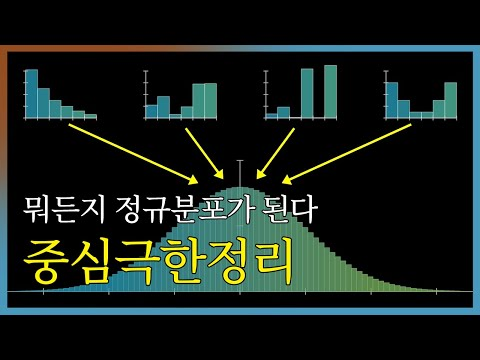

In [8]:
# prompt: 유튜브를 재생하기

from IPython.display import YouTubeVideo

# Replace "YOUR_VIDEO_ID" with the ID of the YouTube video you want to play
YouTubeVideo("SoKjCUcDBf0", width=600, height=300)

In [4]:
# 모집단의 형태를 바꿔가면서 Try
# population = poisson_data
# population = uniform_data
population = exponential_data
# population = normal_data

In [5]:
def simulate_sample_means(population, sample_size=30, n_samples=500):
    sample_means = []

    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))

    return sample_means

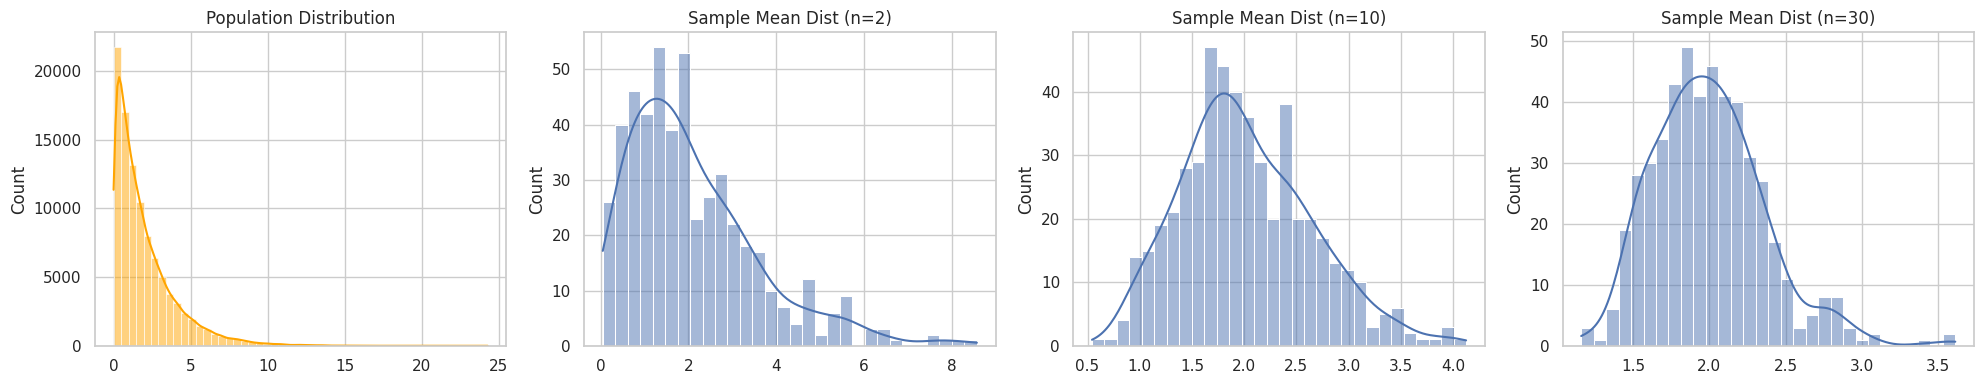

In [6]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

# 모집단 분포 (편향됨)
sns.histplot(population, bins=50, kde=True, color='orange', ax=axs[0])
axs[0].set_title("Population Distribution")

# 각기 다른 샘플 크기로 표본 평균 분포 시각화
for i, n in enumerate([2, 10, 30], 1):
    sample_means = simulate_sample_means(population, sample_size=n)
    sns.histplot(sample_means, bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f"Sample Mean Dist (n={n})")

plt.tight_layout()
plt.show()